In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv('./dataset/cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: './dataset/cleaned.csv'

In [3]:
df_dummies = df.filter(['city', 'state', 'event_type', 'flight_condition','flight_operation', 'sightseeing', 'second_pilot'], axis=1)

In [4]:
# One-hot encode 'city', 'state', 'event_type', 'flight_condition','flight_operation', 'sightseeing', 'second_pilot'

df_dummies = pd.get_dummies(df_dummies, columns=['city', 'state', 'event_type', 'flight_condition','flight_operation', 'sightseeing', 'second_pilot'], drop_first=True)

In [5]:
df_dummies.head(1)

,city_AGUA DULCE,city_ALBUQUERQUE,city_ANAHUAC,city_ANDOVER,city_ANGLETON,city_ANOKA,city_ARCADIA,city_ARECIBO,city_ARGYLE,city_ATLANTA,...,flight_operation_PERS,flight_operation_POSI,flight_operation_PUBF,flight_operation_PUBL,flight_operation_PUBS,flight_operation_PUBU,flight_operation_SKYD,flight_operation_UNK,sightseeing_True,second_pilot_True
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
# making death and injuries as either 1 or 0

for i in range(len(df['deaths_and_injuries'])):
    if df['deaths_and_injuries'][i] > 0:
        df['deaths_and_injuries'][i] = 1

<ipython-input-6-4febe336a289>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deaths_and_injuries'][i] = 1


In [7]:
df['deaths_and_injuries']

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
14317    0.0
14318    1.0
14319    1.0
14320    0.0
14321    1.0
Name: deaths_and_injuries, Length: 14322, dtype: float64

In [8]:
X = df_dummies.values
y = df['deaths_and_injuries'].astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
X_train[0].shape

(5166,)

### Basic Model, 10 layers

In [10]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,)))

# h2
model.add(Dense(2048, activation='relu'))

# h3
model.add(Dense(1024, activation='relu'))

# h4
model.add(Dense(512, activation='relu'))

# h5
model.add(Dense(256, activation='relu'))

# h6
model.add(Dense(128, activation='relu'))

# h7
model.add(Dense(64, activation='relu'))

# h8
model.add(Dense(32, activation='relu'))

# h9
model.add(Dense(16, activation='relu'))

# h10
model.add(Dense(8, activation='relu'))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/20
42/42 [==============================] - 10s 230ms/step - loss: 0.6837 - acc: 0.5513 - val_loss: 0.6782 - val_acc: 0.5398
Epoch 2/20
42/42 [==============================] - 11s 268ms/step - loss: 0.6061 - acc: 0.6843 - val_loss: 0.7160 - val_acc: 0.5624
Epoch 3/20
42/42 [==============================] - 15s 367ms/step - loss: 0.4713 - acc: 0.7834 - val_loss: 0.7424 - val_acc: 0.5554
Epoch 4/20
42/42 [==============================] - 16s 380ms/step - loss: 0.3678 - acc: 0.8247 - val_loss: 0.9593 - val_acc: 0.5605
Epoch 5/20
42/42 [==============================] - 15s 366ms/step - loss: 0.3020 - acc: 0.8507 - val_loss: 1.1214 - val_acc: 0.5512
Epoch 6/20
42/42 [==============================] - 15s 354ms/step - loss: 0.2668 - acc: 0.8527 - val_loss: 1.3081 - val_acc: 0.5599
Epoch 7/20
42/42 [==============================] - 15s 368ms/step - loss: 0.2401 - acc: 0.8618 - val_loss: 1.7059 - val_acc: 0.5619
Epoch 8/20
42/42 [==============================] - 15s 360ms/step - 

In [11]:
preds_loss_10 = model.predict(X_test)

In [12]:
# Visualize the loss
train_loss_10 = results.history['loss']
test_loss_10 = results.history['val_loss']

In [1]:
plt.figure(figsize=(12, 8))
plt.plot(train_loss_10, label='Training loss', color='navy')
plt.plot(test_loss_10, label='Testing loss', color='skyblue')
plt.legend();

plt.savefig('../images/nn_10.png', bbox_inches='tight')

NameError: name 'plt' is not defined

### Basic Model, 5 layers A

In [14]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,)))

# h2
model.add(Dense(2048, activation='relu'))

# h3
model.add(Dense(1024, activation='relu'))

# h4
model.add(Dense(512, activation='relu'))

# h5
model.add(Dense(256, activation='relu'))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/20
42/42 [==============================] - 17s 363ms/step - loss: 0.6783 - val_loss: 0.6646
Epoch 2/20
42/42 [==============================] - 15s 359ms/step - loss: 0.5792 - val_loss: 0.7058
Epoch 3/20
42/42 [==============================] - 15s 357ms/step - loss: 0.4352 - val_loss: 0.7802
Epoch 4/20
42/42 [==============================] - 15s 362ms/step - loss: 0.3434 - val_loss: 0.9713
Epoch 5/20
42/42 [==============================] - 15s 358ms/step - loss: 0.2885 - val_loss: 1.2392
Epoch 6/20
42/42 [==============================] - 15s 368ms/step - loss: 0.2560 - val_loss: 1.4822
Epoch 7/20
42/42 [==============================] - 16s 370ms/step - loss: 0.2355 - val_loss: 1.5600
Epoch 8/20
42/42 [==============================] - 15s 357ms/step - loss: 0.2300 - val_loss: 1.4855
Epoch 9/20
42/42 [==============================] - 15s 353ms/step - loss: 0.2199 - val_loss: 1.9857
Epoch 10/20
42/42 [==============================] - 15s 362ms/step - loss: 0.2156 - val_lo

In [15]:
preds_loss_a = model.predict(X_test)

In [16]:
# Visualize the loss
train_loss_a = results.history['loss']
test_loss_a = results.history['val_loss']

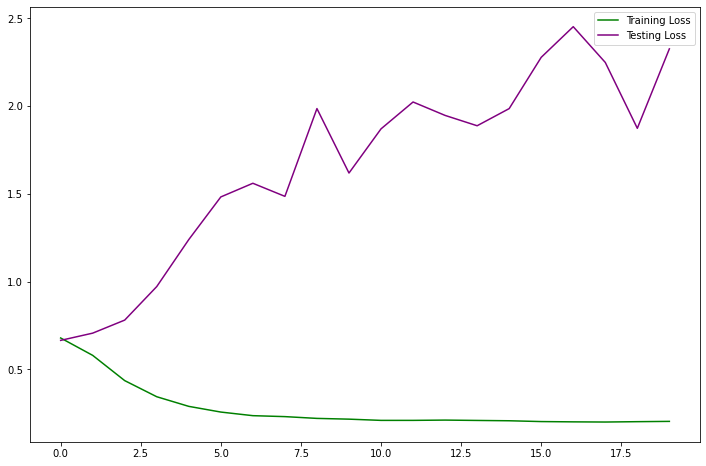

In [17]:
plt.figure(figsize=(12, 8))

plt.plot(train_loss_a, label='Training Loss', color='green')
plt.plot(test_loss_a, label='Testing Loss', color='purple')

plt.legend();

plt.savefig('../images/nn_a.png', bbox_inches='tight')

### Basic Model, 5 layers B

In [18]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,)))

# h2
model.add(Dense(1024, activation='relu'))

# h3
model.add(Dense(256, activation='relu'))

# h4
model.add(Dense(64, activation='relu'))

# h5
model.add(Dense(16, activation='relu'))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/20
21/21 [==============================] - 10s 403ms/step - loss: 0.6765 - acc: 0.5684 - val_loss: 0.6666 - val_acc: 0.5861
Epoch 2/20
21/21 [==============================] - 8s 381ms/step - loss: 0.5761 - acc: 0.7066 - val_loss: 0.7155 - val_acc: 0.5708
Epoch 3/20
21/21 [==============================] - 8s 386ms/step - loss: 0.4373 - acc: 0.8041 - val_loss: 0.7889 - val_acc: 0.5596
Epoch 4/20
21/21 [==============================] - 8s 385ms/step - loss: 0.3546 - acc: 0.8330 - val_loss: 0.8951 - val_acc: 0.5607
Epoch 5/20
21/21 [==============================] - 8s 378ms/step - loss: 0.3074 - acc: 0.8520 - val_loss: 0.9445 - val_acc: 0.5599
Epoch 6/20
21/21 [==============================] - 8s 397ms/step - loss: 0.2825 - acc: 0.8617 - val_loss: 1.0720 - val_acc: 0.5619
Epoch 7/20
21/21 [==============================] - 8s 381ms/step - loss: 0.2598 - acc: 0.8653 - val_loss: 1.1141 - val_acc: 0.5565
Epoch 8/20
21/21 [==============================] - 8s 388ms/step - loss: 0

In [19]:
preds_loss_b = model.predict(X_test)

In [20]:
# Visualize the loss
train_loss_b = results.history['loss']
test_loss_b = results.history['val_loss']

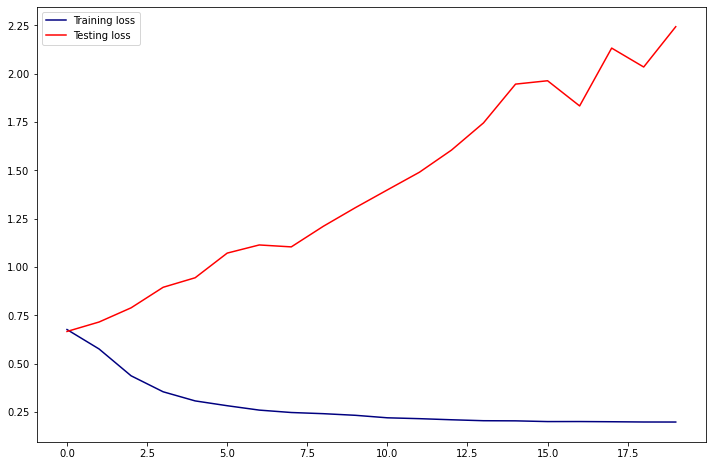

In [21]:
plt.figure(figsize=(12, 8))

plt.plot(train_loss_b, label='Training loss', color='navy')
plt.plot(test_loss_b, label='Testing loss', color='red')

plt.legend();

plt.savefig('../images/nn_b.png', bbox_inches='tight')

===

### Model with L2 Regularizer, 5 layers B

In [22]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,), kernel_regularizer=l2(.001)))

# h2
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(.001)))

# h3
model.add(Dense(256, activation='relu', kernel_regularizer=l2(.001)))

# h4
model.add(Dense(64, activation='relu', kernel_regularizer=l2(.001)))

# h5
model.add(Dense(16, activation='relu', kernel_regularizer=l2(.001)))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=30,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/30
42/42 [==============================] - 21s 420ms/step - loss: 2.2021 - acc: 0.5594 - val_loss: 0.8376 - val_acc: 0.5649
Epoch 2/30
42/42 [==============================] - 17s 411ms/step - loss: 0.7561 - acc: 0.5812 - val_loss: 0.7164 - val_acc: 0.5806
Epoch 3/30
42/42 [==============================] - 17s 409ms/step - loss: 0.7092 - acc: 0.5973 - val_loss: 0.7059 - val_acc: 0.5831
Epoch 4/30
42/42 [==============================] - 17s 414ms/step - loss: 0.7041 - acc: 0.6061 - val_loss: 0.7195 - val_acc: 0.5881
Epoch 5/30
42/42 [==============================] - 18s 419ms/step - loss: 0.6857 - acc: 0.6512 - val_loss: 0.7482 - val_acc: 0.5633
Epoch 6/30
42/42 [==============================] - 17s 418ms/step - loss: 0.6595 - acc: 0.7076 - val_loss: 0.7622 - val_acc: 0.5725
Epoch 7/30
42/42 [==============================] - 17s 417ms/step - loss: 0.6134 - acc: 0.7526 - val_loss: 0.7639 - val_acc: 0.5783
Epoch 8/30
42/42 [==============================] - 17s 395ms/step - 

In [23]:
preds_l2_b = model.predict(X_test)

In [24]:
# Visualize loss
train_l2_b = results.history['loss']
test_l2_b = results.history['val_loss']

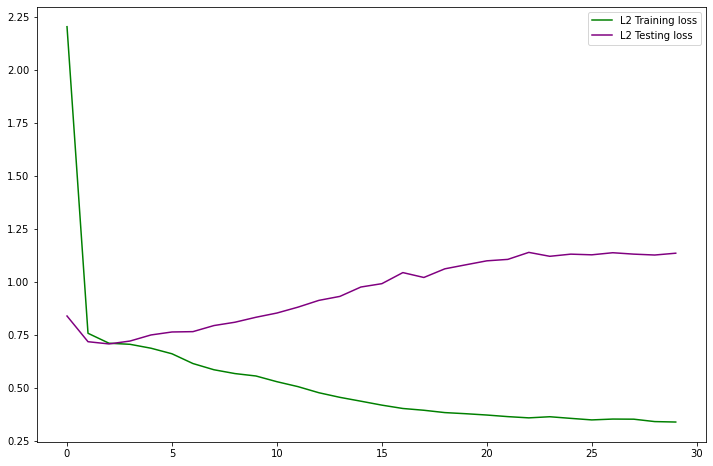

In [25]:
plt.figure(figsize=(12, 8))

plt.plot(train_l2_b, label='L2 Training loss', color='green')
plt.plot(test_l2_b, label='L2 Testing loss', color='purple')

plt.legend();

plt.savefig('../images/nn_rl2b.png', bbox_inches='tight')

### Model with L2 Regularizer, 5 layers A

In [26]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,), kernel_regularizer=l2(.001)))

# h2
model.add(Dense(2048, activation='relu', kernel_regularizer=l2(.001)))

# h3
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(.001)))

# h4
model.add(Dense(512, activation='relu', kernel_regularizer=l2(.001)))

# h5
model.add(Dense(256, activation='relu', kernel_regularizer=l2(.001)))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/20
42/42 [==============================] - 26s 559ms/step - loss: 3.0111 - acc: 0.5486 - val_loss: 0.8809 - val_acc: 0.5747
Epoch 2/20
42/42 [==============================] - 22s 533ms/step - loss: 0.7569 - acc: 0.5762 - val_loss: 0.7042 - val_acc: 0.5741
Epoch 3/20
42/42 [==============================] - 22s 527ms/step - loss: 0.6996 - acc: 0.5926 - val_loss: 0.6954 - val_acc: 0.5839
Epoch 4/20
42/42 [==============================] - 23s 538ms/step - loss: 0.6875 - acc: 0.6188 - val_loss: 0.7119 - val_acc: 0.5761
Epoch 5/20
42/42 [==============================] - 22s 533ms/step - loss: 0.6730 - acc: 0.6724 - val_loss: 0.7479 - val_acc: 0.5582
Epoch 6/20
42/42 [==============================] - 22s 536ms/step - loss: 0.6391 - acc: 0.7328 - val_loss: 0.7872 - val_acc: 0.5839
Epoch 7/20
42/42 [==============================] - 22s 528ms/step - loss: 0.6025 - acc: 0.7546 - val_loss: 0.8021 - val_acc: 0.5716
Epoch 8/20
42/42 [==============================] - 23s 538ms/step - 

In [27]:
preds_l2_a = model.predict(X_test)

In [28]:
# Visualize loss
train_l2_a = results.history['loss']
test_l2_a = results.history['val_loss']

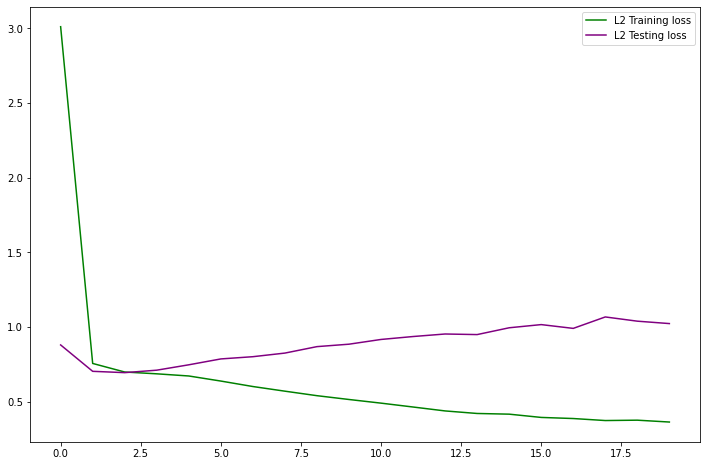

In [29]:
plt.figure(figsize=(12, 8))

plt.plot(train_l2_a, label='L2 Training loss', color='green')
plt.plot(test_l2_a, label='L2 Testing loss', color='purple')

plt.legend();

plt.savefig('../images/nn_rl2a.png', bbox_inches='tight')

===

### Dropout Model, 5 layers B

In [30]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,)))
model.add(Dropout(.8))

# h2
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.8))

# h3
model.add(Dense(256, activation='relu'))
model.add(Dropout(.8))

# h4
model.add(Dense(64, activation='relu'))
model.add(Dropout(.8))

# h5
model.add(Dense(16, activation='relu'))
model.add(Dropout(.8))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/20
42/42 [==============================] - 16s 321ms/step - loss: 0.7451 - acc: 0.5135 - val_loss: 0.6914 - val_acc: 0.5557
Epoch 2/20
42/42 [==============================] - 12s 274ms/step - loss: 0.7024 - acc: 0.5308 - val_loss: 0.6903 - val_acc: 0.5557
Epoch 3/20
42/42 [==============================] - 11s 267ms/step - loss: 0.6982 - acc: 0.5324 - val_loss: 0.6895 - val_acc: 0.5557
Epoch 4/20
42/42 [==============================] - 13s 311ms/step - loss: 0.6938 - acc: 0.5388 - val_loss: 0.6888 - val_acc: 0.5557
Epoch 5/20
42/42 [==============================] - 13s 301ms/step - loss: 0.6932 - acc: 0.5416 - val_loss: 0.6884 - val_acc: 0.5557
Epoch 6/20
42/42 [==============================] - 13s 301ms/step - loss: 0.6928 - acc: 0.5379 - val_loss: 0.6881 - val_acc: 0.5557
Epoch 7/20
42/42 [==============================] - 12s 299ms/step - loss: 0.6911 - acc: 0.5423 - val_loss: 0.6879 - val_acc: 0.5557
Epoch 8/20
42/42 [==============================] - 13s 305ms/step - 

In [31]:
preds_dropout_b = model.predict(X_test)

In [32]:
train_dropout_b = results.history['loss']
test_dropout_b = results.history['val_loss']

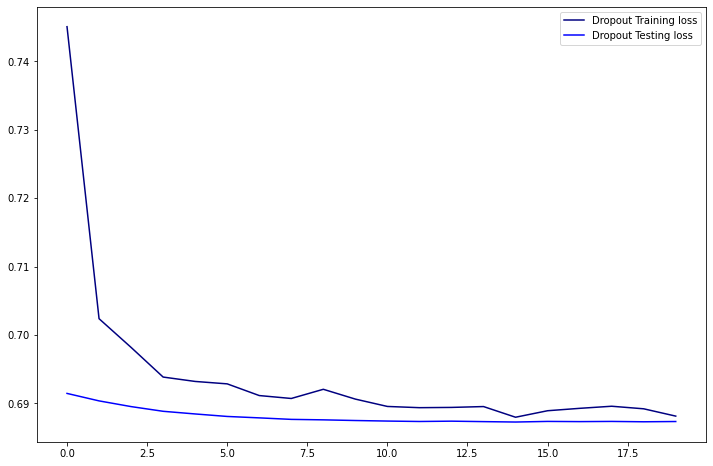

In [33]:
plt.figure(figsize=(12, 8))

plt.plot(train_dropout_b, label='Dropout Training loss', color='navy')
plt.plot(test_dropout_b, label='Dropout Testing loss', color='blue')

plt.legend();

plt.savefig('../images/nn_drop_b.png', bbox_inches='tight')

===

### Dropout Model, 5 layers A

In [34]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,)))
model.add(Dropout(.8))

# h2
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.8))

# h3
model.add(Dense(256, activation='relu'))
model.add(Dropout(.8))

# h4
model.add(Dense(64, activation='relu'))
model.add(Dropout(.8))

# h5
model.add(Dense(16, activation='relu'))
model.add(Dropout(.8))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/20
21/21 [==============================] - 12s 456ms/step - loss: 0.7436 - acc: 0.5128 - val_loss: 0.6922 - val_acc: 0.5557
Epoch 2/20
21/21 [==============================] - 9s 432ms/step - loss: 0.7068 - acc: 0.5160 - val_loss: 0.6913 - val_acc: 0.5557
Epoch 3/20
21/21 [==============================] - 9s 429ms/step - loss: 0.6981 - acc: 0.5297 - val_loss: 0.6907 - val_acc: 0.5557
Epoch 4/20
21/21 [==============================] - 9s 446ms/step - loss: 0.6943 - acc: 0.5315 - val_loss: 0.6901 - val_acc: 0.5557
Epoch 5/20
21/21 [==============================] - 9s 441ms/step - loss: 0.6936 - acc: 0.5362 - val_loss: 0.6896 - val_acc: 0.5557
Epoch 6/20
21/21 [==============================] - 9s 438ms/step - loss: 0.6929 - acc: 0.5381 - val_loss: 0.6891 - val_acc: 0.5557
Epoch 7/20
21/21 [==============================] - 9s 440ms/step - loss: 0.6921 - acc: 0.5419 - val_loss: 0.6888 - val_acc: 0.5557
Epoch 8/20
21/21 [==============================] - 9s 437ms/step - loss: 0

In [35]:
preds_dropout_a = model.predict(X_test)

In [36]:
train_dropout_a = results.history['loss']
test_dropout_a = results.history['val_loss']

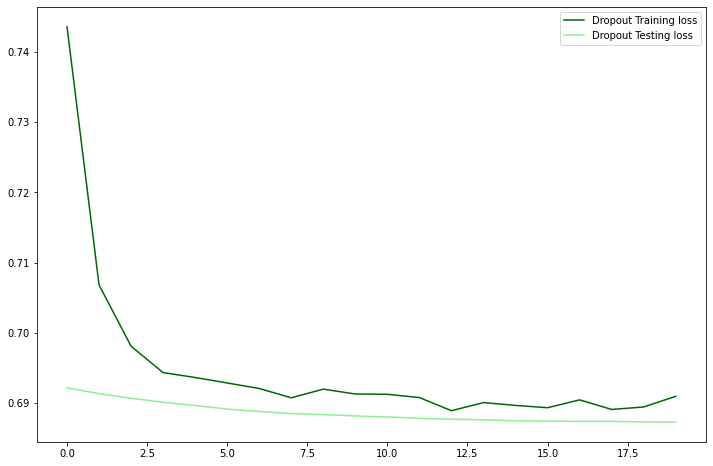

In [37]:
plt.figure(figsize=(12, 8))

plt.plot(train_dropout_a, label='Dropout Training loss', color='darkgreen')
plt.plot(test_dropout_a, label='Dropout Testing loss', color='lightgreen')

plt.legend();

plt.savefig('../images/nn_drop_a.png', bbox_inches='tight')

===

### Add early stops

In [38]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,)))
model.add(Dropout(.8))

# h2
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.8))

# h3
model.add(Dense(256, activation='relu'))
model.add(Dropout(.8))

# h4
model.add(Dense(64, activation='relu'))
model.add(Dropout(.8))

# h5
model.add(Dense(16, activation='relu'))
model.add(Dropout(.8))

# output
model.add(Dense(1, activation='sigmoid'))
early_stop = EarlyStopping(patience=5)

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop],
                    verbose=1) # <- printing

Epoch 1/20
21/21 [==============================] - 12s 443ms/step - loss: 0.7501 - acc: 0.5194 - val_loss: 0.6927 - val_acc: 0.5557
Epoch 2/20
21/21 [==============================] - 9s 428ms/step - loss: 0.7076 - acc: 0.5219 - val_loss: 0.6918 - val_acc: 0.5557
Epoch 3/20
21/21 [==============================] - 9s 430ms/step - loss: 0.6984 - acc: 0.5296 - val_loss: 0.6910 - val_acc: 0.5557
Epoch 4/20
21/21 [==============================] - 9s 429ms/step - loss: 0.6952 - acc: 0.5333 - val_loss: 0.6902 - val_acc: 0.5557
Epoch 5/20
21/21 [==============================] - 9s 439ms/step - loss: 0.6936 - acc: 0.5381 - val_loss: 0.6897 - val_acc: 0.5557
Epoch 6/20
21/21 [==============================] - 9s 436ms/step - loss: 0.6916 - acc: 0.5454 - val_loss: 0.6893 - val_acc: 0.5557
Epoch 7/20
21/21 [==============================] - 9s 443ms/step - loss: 0.6916 - acc: 0.5444 - val_loss: 0.6889 - val_acc: 0.5557
Epoch 8/20
21/21 [==============================] - 9s 430ms/step - loss: 0

In [39]:
preds_es = model.predict(X_test)

In [40]:
# Visualize loss
train_es = results.history['loss']
test_es = results.history['val_loss']

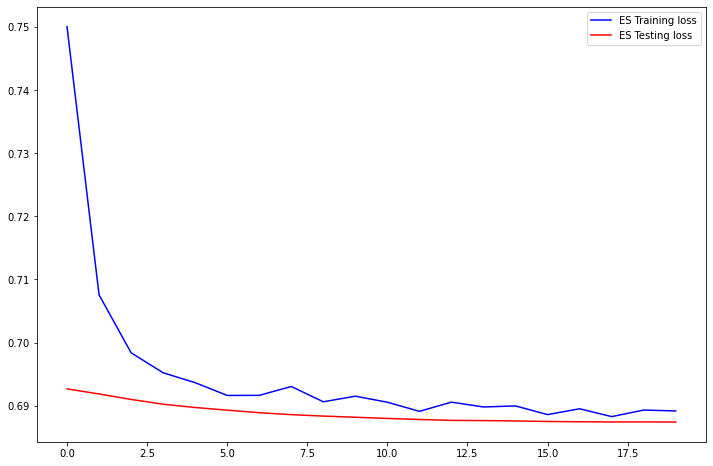

In [41]:
plt.figure(figsize=(12, 8))

plt.plot(train_es, label='ES Training loss', color='blue')
plt.plot(test_es, label='ES Testing loss', color='red')

plt.legend();

plt.savefig('../images/nn_es.png', bbox_inches='tight')

### Add early stops, drop and regularizer

In [42]:
# model
model = Sequential()

# h1
model.add(Dense(4096, activation='relu', input_shape=(5166,), kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# h2
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# h3
model.add(Dense(256, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# h4
model.add(Dense(64, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# h5
model.add(Dense(16, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# output
model.add(Dense(1, activation='sigmoid'))
early_stop = EarlyStopping(patience=5)

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop],
                    verbose=1) # <- printing

Epoch 1/50
21/21 [==============================] - 16s 606ms/step - loss: 4.4448 - acc: 0.5048 - val_loss: 2.7351 - val_acc: 0.5557
Epoch 2/50
21/21 [==============================] - 12s 565ms/step - loss: 2.4623 - acc: 0.5160 - val_loss: 2.2077 - val_acc: 0.5557
Epoch 3/50
21/21 [==============================] - 12s 566ms/step - loss: 2.0202 - acc: 0.5258 - val_loss: 1.8304 - val_acc: 0.5557
Epoch 4/50
21/21 [==============================] - 12s 565ms/step - loss: 1.6973 - acc: 0.5322 - val_loss: 1.5588 - val_acc: 0.5557
Epoch 5/50
21/21 [==============================] - 12s 566ms/step - loss: 1.4582 - acc: 0.5436 - val_loss: 1.3539 - val_acc: 0.5557
Epoch 6/50
21/21 [==============================] - 12s 569ms/step - loss: 1.2779 - acc: 0.5435 - val_loss: 1.1982 - val_acc: 0.5557
Epoch 7/50
21/21 [==============================] - 12s 564ms/step - loss: 1.1404 - acc: 0.5467 - val_loss: 1.0816 - val_acc: 0.5557
Epoch 8/50
21/21 [==============================] - 12s 581ms/step - 

In [43]:
preds_es_rg = model.predict(X_test)

In [44]:
# Visualize loss
train_es_rg = results.history['loss']
test_es_rg = results.history['val_loss']

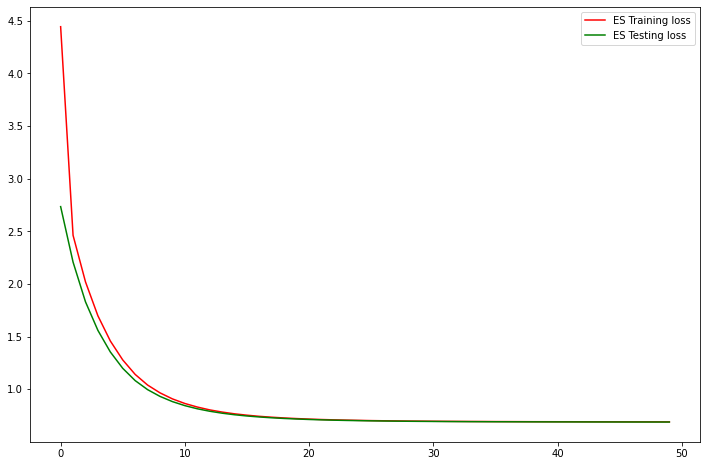

In [45]:
plt.figure(figsize=(12, 8))

plt.plot(train_es_rg, label='ES Training loss', color='Red')
plt.plot(test_es_rg, label='ES Testing loss', color='green')

plt.legend();

plt.savefig('../images/nn_es_rg.png', bbox_inches='tight')